# Problem 1 (Theoretical tasks)

## 40 pts

### Ranks and skeleton decomposition

* What is the rank of the matrix $\begin{pmatrix}1 & 1 & 1 \\ 2 & 2 & 2 \\ 1 & 2 & 1\end{pmatrix}$? Why? Find its skeleton decomposition.

* Find rank of the matrix $a_{ij} = (i+j)^2$, $i,j=1,\dots,n$. Find its skeleton decomposition. **Note:** use interpretation of rank as the minimal number of summarands with separated variables $i$ and $j$.

### SVD

Interesting remark: matrix norms that have the form $$\|A\|^{\text{shatten}}_p = \left(\sigma_1^p(A) + \dots + \sigma_r^p(A)\right)^{1/p}$$ are called **Shatten norms**, where $\sigma_i(A)$ are singular values of $A$. Important cases are $p=2$ - the Frobenius norm, $p=\infty$ - the second norm and $p=1$ - the nuclear norm.

* Prove that $\|A\|_2 = \sigma_1(A)$ and $\|A\|_F = \sqrt{\sigma_1^2(A) + \dots + \sigma_r^2(A)}$. **Note:** unitary invariance of the second and Frobenius norms might be helpful.

* Find the distance between $A$ and its truncated SVD in the second and in the Frobenius norms.

* Suppose $A^* = A$. Find the exact relation between the eigenvalues and singular values of $A$.

### Eigenvalues

* Is matrix $\begin{pmatrix}1 & 0 & 1 \\ 0 & 0 & 0 \\ 1 & 0 & 1\end{pmatrix}$ diagonalizable? Why?

* Prove that $\lambda(A)\in \mathbb{R}^1$ if $A$ is Hermitian, $\lambda(A)$ has only imaginary part if $A$ is skew-Hermitian and $|\lambda(A)|=1$ if $A$ is unitary.

### Linear systems

* Is it possible to solve 1 000 000 $\times$ 1 000 000 dense linear system on your laptop within 1 month via LU decomposition provided that the LU decomposition is not given?

* What is the complexity of solving a system with a matrix given by its LU or by its QR decomposition. Explain the answer.


### Ranks and skeleton decomposition
The rank of the given matrix is 2 because it has two linearly independant rows. 

In [28]:
import numpy as np
import scipy as sp

a = np.array([[1,1], [2,2], [2, 1]])
b = np.linalg.inv(np.array([[2,2], [2, 1]]))
c = np.array([[2,2,2], [1,2,1]])

print(a.dot(b).dot(c))

[[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 1.  2.  1.]]


In previous section I have proved, that skeleton decomposition is:
$$\begin{pmatrix}1 & 1 \\ 2 & 2 \\ 1 & 2\end{pmatrix} \cdot \begin{pmatrix}2 & 2 \\ 1 & 2\end{pmatrix}^{-1}\begin{pmatrix}2 & 2 & 2 \\ 1 & 2 & 1\end{pmatrix}$$

In [82]:
n = 10

i, j = np.meshgrid(np.arange(n), np.arange(n))
m = (j + i) ** 2
print(m)

[[  0   1   4   9  16  25  36  49  64  81]
 [  1   4   9  16  25  36  49  64  81 100]
 [  4   9  16  25  36  49  64  81 100 121]
 [  9  16  25  36  49  64  81 100 121 144]
 [ 16  25  36  49  64  81 100 121 144 169]
 [ 25  36  49  64  81 100 121 144 169 196]
 [ 36  49  64  81 100 121 144 169 196 225]
 [ 49  64  81 100 121 144 169 196 225 256]
 [ 64  81 100 121 144 169 196 225 256 289]
 [ 81 100 121 144 169 196 225 256 289 324]]


If n = 1, then the rank is 0.
$$(i + j) ^ 2 = i^2 + 2ij + j^2$$
Now we can find how the column looks like. 
$$C_j = j^2 V_1 + 2j V_2 + V_3$$
Where $V_1, V_2, V_3$ are linearly independant vectors.
$V_1 = (1,1,1,...,1)^T$,
$V_2 = (1, 2, 3, ..., n)^T$,
$V_3 = (1^2, 2^2, 3^2,..., n^2)$

So the A's image is a linear combination of V1,V2,V3.
From it we can deduce that the rank of A is at most 3. So, matrix A has rank = min(3, n) if n > 1 and 0 otherwise. 

In [83]:
a = m[0:3, :]
b = np.linalg.inv(m[0:3, 0:3])
c = m[:, 0:3]

print('Error is {0}'.format(np.linalg.norm(c.dot(b).dot(a) - m)))

Error is 8.862721194189875e-13


Skeleton decomposition of matrix M for n > 3 is:
$$\begin{pmatrix}0 & 1 & 4 \\ 1 & 4 & 9\\ 4 & 9 & 16\\ ... & ... & ...\\  \end{pmatrix} \cdot \begin{pmatrix}0 & 1 & 4 \\ 1 & 4 & 9\\ 4 & 9 & 16\end{pmatrix}^{-1}\begin{pmatrix}0 & 1 & 4 & ...\\ 1 & 4 & 9 & ...\\ 4 & 9 & 16 & ...\end{pmatrix}$$

It was proved in a previous section that it gives a very good approximation of a matrix m.

### SVD

$\|A\|_2 = \| U \Sigma V^* \|_2 = \|\Sigma \|_2$ because of unitary invarience and the fact that in SVD U and $V^*$ are unitary.
Then $\|A\|_2 = max_{\| x \|_2 = 1} \| \Sigma x \|_2$. We know that the first singular value is the biggest one, also $\Sigma$ is diagonal by definition of SVD. It means, that $\|A\|_2 = max_{\| x \|_2 = 1} \| \Sigma x \|_2 = \sigma_1(A)$. QED.

$\|A\|_F = \| U \Sigma V^* \|_F = \| \Sigma \|_F = \sqrt{\sum_{i = 1} \sum_{j=1}|a_{ij} |^2}$.
We know that $\Sigma$ is diagonal. So $\|A\|_F = \sqrt{\sigma_1^2(A) + \dots + \sigma_r^2(A)}$. QED.

$$rSVD \ A_{m \times n} = U_{m \times r} \Sigma_{r \times r} V^*_{r \times n}$$
$$SVD \ A_{m \times n} = U_{m \times m} \Sigma_{m \times n} V^*_{n \times n}$$
$$\|SVD \ A_{m \times n} - rSVD \ A_{m \times n}\| = \| U \Sigma V^*  - U \Sigma^\prime V^*\|$$ for every unitary invariant matrix we have: $$\| U \Sigma V^*  - U \Sigma^\prime V^*\| = \| \Sigma  - \Sigma^\prime\| = \left| \begin{matrix} 0 & 0 & \dots & 0\\ 0 & 0 & \dots & 0 \\ 0 & \dots & \sigma_{r + 1} & 0 \\ \dots & \dots & \dots & \sigma_m\end{matrix} \right|$$
Thus $$\|SVD \ A_{m \times n} - rSVD \ A_{m \times n}\|_2 = max_{\| x \|_2 = 1} \| \Delta\Sigma x \|_2 = \sigma_{r+1}$$
$$\|SVD \ A_{m \times n} - rSVD \ A_{m \times n}\|_F = \sqrt{\sum_{i = 1} \sum_{j=1}|a_{ij} |^2} = \sqrt{\sigma_{r+1}^2 + \sigma_{r+1}^2 + ... + \sigma_{m}^2}$$

According to SVD $A^*A = V \Sigma^* U^* U \Sigma V^* = V \Sigma^* \Sigma V^*$. Since $A^* = A$ $A^*A = V \Sigma^2 V^*$ That is exactly eigen value decomposition of matrix $A^*A$. From here we can get that $\sigma = |\lambda|$.

### Eigenvalues

$$(1 - \lambda) (-\lambda) (1 - \lambda) + \lambda = 0$$
$$\lambda(1 - (1 - 2\lambda + \lambda^2)) = 0$$
$\lambda_1 = 0, \lambda_2 = 0, \lambda_3 = 2$

A given matrix is not diagonalizable because it doesn't have 3 linearly independant eigenvectors. Solving of charachteristic polynomial gives us that eigenvalue is any number. From here we can get only two linearly independant eigenvector for this matrix. 

 By definitian of Hermitian matrix $A = A^\dagger$. And so $$Ax = \lambda x, A^\dagger x = \lambda ^\dagger x$$
 And so due to thefact that A = $A^\dagger$ so $\lambda = \lambda ^\dagger$. QED.
 
 By definitian of skew-Hermitian matrix $A^\dagger = -A$. 
 $$Ax = \lambda x$$
 $$A^\dagger x = \lambda ^\dagger x$$
 So $\lambda = - \lambda ^\dagger$
 It could iff $\lambda$ is pure imaginary. QED.
 
 $UU^* = I$ by the definition of unitary matrix. 
 $$UU^* x = \lambda x = Ix = x$$
 Thus $|\lambda| = 1$. QED. 

### Linear Systems

$n = 10^6$

Computing LU is $O(n^3)$. Solving linear system with computed LU is $O(n^3)$. $n^3 = 10^{18}$ The maximum laptop computation power is 2 Gflops = 2 * $10^9$ flops per second. $\dfrac{10^{18}}{2\cdot 10^9} = 0.5 \cdot 10^9$ seconds, that is about 5787 days. The answer is no.

Given the LU decomposition Ax=y, A = LU, LUx = y.
$$x = U^{-1} L^{-1} y$$
Let's define $M = U^{-1} L^{-1}$. Knowing LU decomposition in $O(n^3)$ we can obtain M in $O(n^3)$ too. The only thing for solving linear system is multiplication matrix M by vector y. It is $O(n^2)$ complexity. The same situation is with QR decomposition. If you know QR ones then you can solve with $O(n^2)$ complexity. But obtaining the decomposition itself is $O(n^3)$.

# Problem 2 (QR decomposition)
##  20 pts

* Implement the QR factorization using Housholder reflections and the modified Gram-Schimdt algorithm. Make sure that they work on a random matrix. To measure orthogonality use $\|G - I\|$ as in Problem Set 1

* Compare the Gram-Schmidt (from the Problem Set 1), modified Gram-Schmidt and the Housholder algorithms on $5\times5$, $10\times 10$ and $20\times 20$ Hilbert matrices 

In [458]:
def gram_schmidt(v):
    u = np.zeros(v.shape)

    for i in range(len(v)):
        u[:, i] = v[:, i]
        
        for j in range(i):
            u[:, i] -= u[:, j].dot(v[:, i].transpose()) / np.dot(u[:, j], u[:, j]) * u[:, j]

        u[:, i] = u[:, i] / np.linalg.norm(u[:, i], 2)
        
    return u


def modified_gram_schmidt(v):
    u = np.zeros(v.shape)

    for i in range(len(v)):
        u[:, i] = v[:, i]

        for j in range(i):
            u[:, i] -= u[:, i].dot(u[:, j].transpose()) * u[:, j]

        u[:, i] = u[:, i] / np.linalg.norm(u[:, i], 2)
        
    return u


def hausholder_reflections(A):
    R = A.copy()
    mo, no = R.shape
    Q = np.eye(mo)

    for i in range(no - 1):
        Ai = R[i:, i:]
        m, n = Ai.shape
        sign = np.sign(Ai[0, 0])
        
        if sign == 0:
            sign = 1
        
        vi = Ai[:, 0].transpose() - sign * np.linalg.norm(Ai[:, 0], 2) * np.eye(m, 1, 0).transpose()
        hi = np.eye(m) - 2 * vi * vi.transpose() / vi.dot(vi.transpose())
        Hi = np.eye(mo)
        Hi[i:, i:] = hi
        Q = Q.dot(Hi)
        R[i:, i:] = hi.dot(Ai)
        
    return (Q, R)


def gs_qr(A, f):
    Q = f(A)
    R = Q.transpose().dot(A)
    
    return (Q, R)


def measure_ortoganality_error(U):
    return np.linalg.norm(U.dot(U.transpose()) - np.eye(U.shape[0]), 2)

def measure_qr_accuracy(q, r, a):
    return np.linalg.norm(q.dot(r) - a, 2)

In [462]:
N = 10

random_matrix = np.random.random((N, N))
Q_gs, R_gs = gs_qr(random_matrix, gram_schmidt)
Q_mgs, R_mgs = gs_qr(random_matrix, modified_gram_schmidt)
Q_h, R_h = hausholder_reflections(random_matrix)

G = np.ones((N, N))

print('Ortagonality error of gram-schmidt is: ', measure_ortoganality_error(Q_gs))
print('Ortagonality error of modified gram-schmidt is: ', measure_ortoganality_error(Q_mgs))
print('Ortagonality error of Hausholder is: ', measure_ortoganality_error(Q_h))
print('')
print('Accuracy of gram-schmidt is: ', measure_qr_accuracy(Q_gs, R_gs, random_matrix))
print('Accuracy of modified gram-schmidt is: ', measure_qr_accuracy(Q_mgs, R_mgs, random_matrix))
print('Accuracy of Hausholder is: ', measure_qr_accuracy(Q_h, R_h, random_matrix))

Ortagonality error of gram-schmidt is:  1.15491825309e-13
Ortagonality error of modified gram-schmidt is:  8.12386240749e-15
Ortagonality error of Hausholder is:  8.92271552134e-16

Accuracy of gram-schmidt is:  6.81058503586e-14
Accuracy of modified gram-schmidt is:  1.76212265429e-14
Accuracy of Hausholder is:  1.35324803686e-15


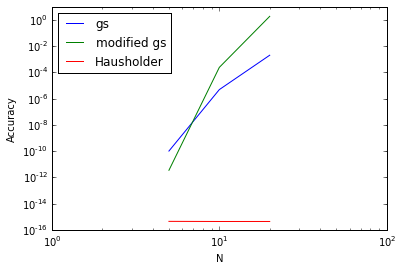

10000 loops, best of 3: 162 µs per loop
10000 loops, best of 3: 146 µs per loop
1000 loops, best of 3: 197 µs per loop
1000 loops, best of 3: 506 µs per loop
1000 loops, best of 3: 434 µs per loop
1000 loops, best of 3: 437 µs per loop
1000 loops, best of 3: 1.72 ms per loop
1000 loops, best of 3: 1.48 ms per loop
1000 loops, best of 3: 1.11 ms per loop


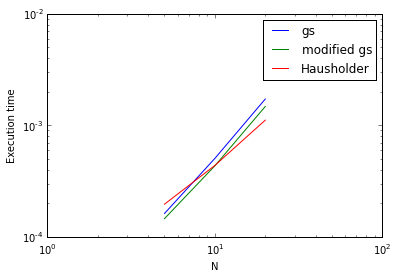

In [488]:
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

N = [5, 10, 20]
gs_accuracy = []
mgs_accuracy = []
h_accuracy = []

for n in N:
    H = sp.linalg.hilbert(n)
    
    Q_gs, R_gs = gs_qr(H, gram_schmidt)
    Q_mgs, R_mgs = gs_qr(H, modified_gram_schmidt)
    Q_h, R_h = hausholder_reflections(H)
    
    gs_accuracy.append(measure_qr_accuracy(Q_gs, R_gs, H))
    mgs_accuracy.append(measure_qr_accuracy(Q_mgs, R_mgs, H))
    h_accuracy.append(measure_qr_accuracy(Q_h, R_h, H))

    
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Accuracy')
plt.xlabel('N')
plt.plot(N, gs_accuracy, label='gs')
plt.plot(N, mgs_accuracy, label='modified gs')
plt.plot(N, h_accuracy, label='Hausholder')
plt.legend(loc='best')
plt.show()

gs_t = []
mgs_t = []
h_t = []

for n in N:
    H = sp.linalg.hilbert(n)
    
    t1 = %timeit -o gs_qr(H, gram_schmidt)
    t2 = %timeit -o gs_qr(H, modified_gram_schmidt)
    t3 = %timeit -o hausholder_reflections(H)
    
    gs_t.append(t1.best)
    mgs_t.append(t2.best)
    h_t.append(t3.best)

    
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Execution time')
plt.xlabel('N')
plt.plot(N, gs_t, label='gs')
plt.plot(N, mgs_t, label='modified gs')
plt.plot(N, h_t, label='Hausholder')
plt.legend(loc='best')
plt.show()

# Problem 3 (PageRank) 

## 40 pts

### Connected graph

* First of all create PageRank matrix $A$ that corresponds to the following graph: <img src="graph1.png" width='200'> Make sure that your matrix is stochastic. What is the largest eigenvalue of this matrix?


* Implement power method and plot relative errors ${|\lambda_{k+1} - 1|}$ (since you know that the exact $\lambda$ is $1$) and $\frac{\|x_{k+1} - x_{k}\|}{\|x_{k+1}\|}$ (since you have no information about $x$) as a function of $k$, where $k$ is the interation number. <font color='red'>DO NOT FORGET TO USE LOGARITHMIC SCALE!</font>

### Disconneted graph: damping factor importance

* Create PageRank matrix $A$ that corresponds to the following graph: <img src="graph2.png" width='200'>

* Run the power method and plot relative errors ${|\lambda_{k+1} - 1|}$  and $\frac{\|x_{k+1} - x_{k}\|}{\|x_{k+1}\|}$ as a function of $k$. Why do you observe the absense of convergence? <br> **Hint:** think about the multiplicity of $\lambda=1$

In order to avoid this problem Larry Page and Sergey Brin proposed to use the following regularization technique:
$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$
where $d$ is small parameter (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix which corresponds to the largest eigenvalue has the following interpretation: consider a person who stays in a random node of the graph (i.e. opens a random web page); at each step he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the guy randomly walks through the graph and the eigenvector we are looking for is exactly his stationary distribution — for each node it tells you the probability of visiting this particular node. Therefore if the guy has started from a part of a graph which is not connected with the other part, he will never get there.  In the regularized model the person at each step follows one of the outcoming links with probability $d$ OR visits a random node from the whole graph with probability $(1-d)$.

* Now run the power method with $A_d$ and plot errors as a function of iteration for different $d$.

### Simple English Wiki

Let us now find the most significant articles on the simple english Wikipedia according to the PageRank model. We provide you with the adjecency matrix of the simple Wikipedia articles (file `simple_wiki_matrix.mat`, matrix can be acessed by the key `'W'`) and the dictionary that maps article id to its name on Wikipedia (file `simple_wiki_dict.pickle`).

* Normalize each column of the adjecency matrix to get a matrix from the PageRank model. Check that the obtained matrix is stochastic.

* Plot relative errors ${|\lambda_{k+1} - 1|}$  and $\frac{\|x_{k+1} - x_{k}\|}{\|x_{k+1}\|}$ as a function of $k$ for different $d$. **Note** that your matrix contains a lot of zeros and is stored in the sparse format. Hence `np.dot(A, x)` will not work. However, sparse matrices has method `.dot()`, so `A.dot(x)` works fine.

* Print names of top-5 articles when $d=0.85$.

{1: 0.3974000441421556, 2: 0.38778944270725907, 3: 0.21481051315058508}

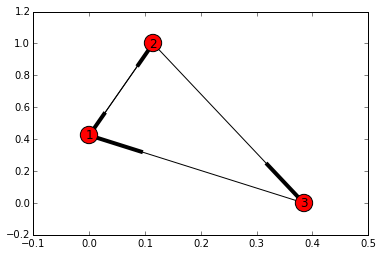

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

graph = nx.DiGraph()
graph.add_edge(1, 2)
graph.add_edge(2, 1)
graph.add_edge(2, 3)
graph.add_edge(3, 1)

matrix = nx.to_numpy_matrix(graph)
nx.draw_networkx(graph)
pr = nx.algorithms.link_analysis.pagerank(graph)
pr

# Problem 4 (Eigenfaces)

## 50 pts

<img src='http://de-bug.de/medien/files/uploads/2009/01/image-eigenfaces.png' width=250>

The aim of this task is to build a face classifier. There are 40 persons in the database. Every person is represented by 10 photos with slightly different facial expression. 
- Download the database of faces [from here](http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html)

- Create training sample:

  Import first 9 images for each face ($9\times 40$ images). Represent these pictures as a matrix $F$ with $9\times 40$ columns, where each column is a reshaped 2D picture. Note: use `np.reshape` to reshape matrix into column
  
  
- Calculate and plot mean face. Subtract it from each column of the matrix $F$

- Calculate SVD decomposition of the shifted matrix F and truncate the obtained representaition: $F_r = U_r S_r V_r^T$. 

 Here $U_r$ is a matrix with $r$ columns - basis set in a space of faces. $W_r = S_r V_r^T$ is a matrix of coefficients in the basis $U_r$. Note that now every image is represented as a small number of coefficients in the basis $U_r$.
 
 
- Plot vectors in $U_r$ using subplots. Make sure that you get face-like images. Now you know what eigenfaces are =)

- Import testing set which is the rest of photos. Find their coefficients in the basis $U_r$. 

- Compare the obtained vectors of coefficients to vectors in $W_r$ using cosine similarity and classify testing faces. As an output give indices of faces that were misclassified when $r=5$.

# Problem 5 (Building recommender systems with SVD)

## 50 pts

Recommender systems are gaining more and more popularity. They're used in a broad range of areas: music, movies, e-commerce, social and professional networks, online news to name a few. Web services like Pandora, Netflix and Amazon build and deploy their own recommender engines in order to make customers happier and generate additional revenue. Those companies, and many others, take the problem of building high-quality recommender system very seriously. One of many examples of a great interest in this area coming from industries is the famous [Netflix competition](http://www.netflixprize.com/rules) with **$1million** prize for winners.

In this task you'll build a very simple yet powerfull engine for recommender system. Given the [Movielens 10M](http://grouplens.org/datasets/movielens/) data you'll implement an SVD-based model of movie recommendation system. SVD-based approach belongs to a family of collaborative filtering algorithms that use matrix factorization (MF). While there are many sophisticated algorithms for MF, pure SVD remains one of the [top-performers](http://www.researchgate.net/publication/221141030_Performance_of_recommender_algorithms_on_top-N_recommendation_tasks). The main idea behind these algorithms is to represent each user and each movie as vectors in some low-dimensional feature space. That low-dimensional space(or ***latent factors space***) shows what features a user likes and which of them are present in a movie. Interpreting those features is a separate and hard task and we will simply build the latent factors using SVD without focusing on the intrinsic meaning of those features. With this model the "likeability" of a movie for a particular user is estimated by a weighted inner product of their latent factors. The model should also respond fast and produce recommendations right after a new user demonstrated some of his preferences. Recomputing SVD for this task may take prohibitively long time that's why we'll use folding-in technique for making fresh recommendations quickly.

<img src='https://pp.vk.me/c625720/v625720880/45153/iI6pRjYXLVE.jpg'>

## Task 0. Preparing the data.

You're given convenience functions `get_movielens_data` and `split_data`. 
* Use these functions to download the data, put it into the memory and split it into the training and testing set with 80/20 rule (80% of the data goes into training set and the rest - into test set).

Be aware that these sets are disjoint, e.g. users from the training set are not in the testing set and vice versa. This means that test users will be "new" (e.g. unseen before) for the trained model. In order to produce reasonable recommendations for these "new" users we will use *folding-in* (see task 2).

*Note*: downloading the dataset may take a couple of minutes. If you already have a copy of MovieLens 10M data on your computer you may force program to use it by specifying *local_file* argument in the `get_movielens_data` function. The *local_file* argument should be a full path to the zip file.

In [1]:
import pandas as pd
from pandas.io.common import ZipFile
from requests import get

import numpy as np
import scipy as sp
from scipy import sparse

from collections import namedtuple
import sys

In [2]:
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO 

In [3]:
def get_movielens_data(local_file=None):
    '''Downloads movielens data, normalizes users and movies ids,
    returns data in sparse CSR format.
    '''
    if not local_file:
        print 'Downloading data...'
        zip_file_url = 'http://files.grouplens.org/datasets/movielens/ml-10m.zip'
        zip_response = get(zip_file_url)
        zip_contents = StringIO(zip_response.content)
        print 'Done.'
    else:
        zip_contents = local_file
    
    print 'Loading data into memory...'
    with ZipFile(zip_contents) as zfile:
        zdata = zfile.read('ml-10M100K/ratings.dat')
        delimiter = ';'
        zdata = zdata.replace('::', delimiter) # makes data compatible with pandas c-engine
        ml_data = pd.read_csv(StringIO(zdata), sep=delimiter, header=None, engine='c',
                                  names=['userid', 'movieid', 'rating', 'timestamp'],
                                  usecols=['userid', 'movieid', 'rating'])
    
    # normalize indices to avoid gaps
    ml_data['movieid'] = ml_data.groupby('movieid', sort=False).grouper.group_info[0]
    ml_data['userid'] = ml_data.groupby('userid', sort=False).grouper.group_info[0]
    
    # build sparse user-movie matrix
    data_shape = ml_data[['userid', 'movieid']].max() + 1
    data_matrix = sp.sparse.csr_matrix((ml_data['rating'],
                                       (ml_data['userid'], ml_data['movieid'])),
                                        shape=data_shape, dtype=np.float64)
    
    print 'Done.'
    return data_matrix

In [4]:
def split_data(data, test_ratio=0.2):
    '''Randomly splits data into training and testing datasets. Default ratio is 80%/20%.
    Returns datasets in namedtuple format for convenience. Usage:
    train_data, test_data = split_data(data_matrix)
    or
    movielens_data = split_data(data_matrix)
    and later in code: 
    do smth with movielens_data.train 
    do smth with movielens_data.test
    '''
    
    num_users = data.shape[0]
    idx = np.zeros((num_users,), dtype=bool)
    sel = np.random.choice(num_users, test_ratio*num_users, replace=False)
    np.put(idx, sel, True)
    
    Movielens_data = namedtuple('MovieLens10M', ['train', 'test'])
    movielens_data = Movielens_data(train=data[~idx, :], test=data[idx, :])
    return movielens_data

## Task 1. Building the core of recommender.

Build representation of users and movies in the latent factors space with help of SVD.

* Calculate the data sparsity (e.g. number of nonzero elements divided by the total size of the matrix)
* Is it feasible to use regular SVD from `numpy.linalg` on your computer for this task?
* Fix the rank of approximation and compute truncated SVD using `scipy.linalg.svds`.
    * Be aware that `scipy` returns singular values in ascending order (see the docs).
    * Sort all your svd data in descending (by singular values) order without breaking the result of the product (i.e. without messing up the low-rank approximation).
* The data returned by sparse SVD is also not contiguous in memory which may affect performance. Use `np.ascontiguousarray` to fix that.
* Plot singular values.
    * Can you tell from the graph whether the data has a low-rank structure?
    * Is it possible to estimate from the graph what SVD rank (or number of latent factors) will be sufficient for your model?
* Pick several users at random from the training set. Calculate recommendations for these users using truncated SVD. Compare movies that users rated with top-10 recommendations produced by your latent factors model. What can you say about produced recommendations?

## Task 2. Evaluating performance of the recommender.

Evaluation of the model is done by splitting test dataset into 2 subsets:
* user's behaviour history - this is used to produce recommendations by your trained model
* evaluation data - considered as the ground truth and used to estimate the quality of recommendations

Overall perfromance is measured by the total number of correct predictions made by the model on the test set.


Your tasks:
* Set $N$  - size of evaluation set - equal to 3 (for building top-3 recommendations).
* Split the test dataset into history and evaluation subsets. The simplest way is to do it user-by-user (e.g row-by-row) in the loop (see pseudocode below). In each row the last $N$ rated movies are used as evaluation data and all remainig user's ratings go into history subset. Scipy functions `.nonzero()` or `.indices` might be helpful.
* For each user from test set generate top-$N$ recommendations using the history subset and folding-in technique (described below).
    * What is the complexity of making recommendations for a new user? Compare it with calculation of full SVD.
    * Is it a good idea to use folding-in technique for all future users without recomputing SVD? Why?
* Calculate the number of correctly predicted recommendations (a.k.a. # of hits). This is done by calculating the number of recommended items which are also present in the evaluation subset for the selected user. You may want to use `numpy.in1d` function.
* Report the total number of correct predictions over the full test set.

### Folding-in technique

<img src="http://web.eecs.utk.edu/~mberry/sc95/gif/berry_figure286.gif"/>


A new user can be considered as an update to original matrix (appending new row). Appending a row in the original matrix corresponds to appending a row into the users latent factors matrix in the SVD decomposition. We can formulate the relation between theese two updates as (see [here](http://web.eecs.utk.edu/~mberry/sc95/sc95.html) for details and picture above, for single user $q$ = 1):
$$
p^T = x^TVS^{-1}
$$
Where $p$ is an update to latent factors matrix and $x$ is an update to original user-movie matrix (e.g. user's preferences or behaviour history). Then, to compute recommendations for the new user we simply restore a part of the original matrix, corresponding to the update:
$$
r^T = p^TSV^T = x^TVV^T
$$
where $r$ is our recommendations vector that we're looking for:
$$
r = VV^Tx
$$

Note, that matrix $P = VV^T$ satisfies the following property: $P^2 = P$, e.g. $P$ - is a projector. This means that our folding-in procedure can be naturally describied as a projection of the user preferences onto the latent factors space.

### Pseudocode for measuring recommender system quality

```
initialize total_score variable with 0
for each user in test-data:
    rating_history <-- all but the last N movies rated by user
    evaluation_set <-- the last N movies rated by user
    
    initialize user_preferences_vector with 1s using rating_history as indices of non-zero values
    top-N recommendations <-- folding-in applied to user_preferences_vector
    correct_predictions <-- # of intersections of recommendations and evaluation_set
    total_score <-- total_score + correct_predictions

return total_score
```

You may use different implementation at your will, the only two criterias:
* it should be not slower than a reference implementation
* it should produce correct results

## Task 3. Fine-tuning your model.

* Try to find the rank that produces the best evaluation score
    * Plot the dependency of evaluation score on rank of SVD for all your trials in one graph
* Report the best result and the coressponding SVD rank
* Compare your model with the non-personalized recommender which simply recommends top-3 movies with highest average ratings. 

Optionally:
You may want to test you parameters with different data splittings in order to minimize risk of local effects.
You're also free to add modifications to your code for producing better results. Report what modificatons you've done and what effect it had if any.